# Feature Engineering and Data Analysis

In this stage of the project, there are several key steps that need to be taken in order to find a relevant solution to the business question.

The **first step** is **Feature engineering**, where I will decide on which features are relevant to the project's goal, brainstorm if new features are needed, and test those features.

The **second step** is the **Data Analysis**, which will drive answers to questions posed as relevant to the project's goal.

<h2>Contents</h2>

<ul>
  <li>1. Imports</li>
  <li>2. Data</li>
  <li>3. Feature Engineering </li>
    <ul>
      <li>3.1 Profit</li>
      <li>3.2 ROI</li>
      <li>3.3 Profit margin</li>
      <li>3.4 VAR (Value Above Replacement)</li>
      <li>3.5 Removing irrelevant features</li>
    </ul>
  <li>4. Data Analysis</li>
    <ul>
      <li>4.1 What is the correlation between budget and profit? Which budget ranges should be considered for making a Box Office success?</li>
      <li>4.2 Do actors/actresses and directors play a role in a movie’s success?</li>
      <li>4.3 How does a movie’s score rating impact profit?</li>
      <li>4.4 How does the trend of profit, revenue, profit margin, and other attributes change over years, and can it be relevant to future strategy?</li>
      <li>4.5 How do genres play in with profit and profit margin?</li>
      <li>4.6 s there a pattern in common plot keywords with successful movies?</li>
      <li>4.7 Are duration and content rating relevant to profit?</li>
      <li>4.8 What can we learn from number of votes, and critic reviews in regards to genres and profit?</li>
    </ul>  
</ul>

# 1. Imports

In [1]:
#basic libraries for linear algebra and data processing
import numpy as np
import pandas as pd

#visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

#text processing tools
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter

#time and warnings
import time
import warnings

#settings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_context('poster', font_scale=0.5)

# 2. Data

I will load the preprocessed and cleaned data from the previous stage.

In [2]:
#loading data into a pandas dataframe
movies = pd.read_csv('data/movies_preprocessed.csv')

In [3]:
#inspecting the first five rows
movies.head()

,Unnamed: 0,color,director_name,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes,budget ($) millions,gross ($) millions,num_voted_mill
0,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,237.0,760.51,0.89
1,1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,300.0,309.40,0.47
2,2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,245.0,200.07,0.28
3,3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,250.0,448.13,1.14
4,4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,...,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,263.7,73.06,0.21


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 3410 non-null   int64  
 1   color                      3410 non-null   object 
 2   director_name              3410 non-null   object 
 3   num_critic_reviews         3410 non-null   float64
 4   duration                   3410 non-null   float64
 5   director_facebook_likes    3410 non-null   float64
 6   actor_3_facebook_likes     3410 non-null   float64
 7   actor_2_name               3410 non-null   object 
 8   actor_1_facebook_likes     3410 non-null   float64
 9   gross                      3410 non-null   float64
 10  genres                     3410 non-null   object 
 11  actor_1_name               3410 non-null   object 
 12  movie_title                3410 non-null   object 
 13  num_users_voted            3410 non-null   int64

# 3. Feature engineering

**Analysis**

- I identified *gross* and *budget* features to be highly valuable for the analysis, having in mind that the project's goal includes determining Box Office Success variables.
- Both *gross* and *budget* can produce new features that might give us additional insights. Proposed new features are as follows:
  1. Profit
  2. Return of Investment (ROI)
  3. Profit Margin

------
- In order to assess an actor's or a directors value to a movie, upon some research, I found VAR (Value Above Replacement) to be a potential option, and worth exploring. Value Above Replacement (VAR) represents a value of number of times a figure (actor/actress or a director) has exceeded an average amount. In terms of profit, VAR measures the X times an actor/actress or a director appeared in movies with an above average profit.

# 3.1 Profit

- Profit is defined as a financial gain, especially the difference between the amount earned and the amount spent in buying, operating, or producing something.

- I calculated profit by subtracting the production cost (in this case *budget*) by the total amount earned (*gross*), and I created a new feature called *profit*.

In [5]:
movies['profit'] = movies['gross ($) millions'] - movies['budget ($) millions']

# 3.2 Return of Investment (ROI)

- Return Of Investment (ROI) is a popular profitability metric used to evaluate how well an investment has performed. ROI tries to directly measure the amount of return on a particular investment, relative to the investment’s cost. 
- ROI is expressed as a percentage and is calculated by dividing an investment's net profit (or loss) by its initial cost or outlay.
- I calculated ROI by subtracting the budget by net profit, and multiplying it by 100, and I created a new feature called *roi* expressed as a percentage.

In [6]:
movies['roi'] = (movies['profit']/movies['budget ($) millions'] * 100).round(2)

# 3.3 Profit Margin

- The profit margin measures what percentage of revenue (in this case *gross*) a movie keeps after paying for all expenses. The profit margin lets us know how much profit a movie has generated for each dollar of sale. For example, a 40% profit margin means you have a net income of $0.40 for each dollar of sales. **Profit margin shows the overall ability to turn income into profit.**

- I used the following formula to calculate the profit margin, and create a new feature called *profit_margin*: Profit Margin = (Profit / Gross) X 100

In [7]:
movies['profit_margin'] = (movies['profit'] / movies['gross ($) millions']).round(2)

# 3.4 VAR (Value Above Replacement)

- Value Above Replacement (VAR) represents a value of number of times a figure (actor/actress or a director) has exceeded an average amount. In terms of profit, VAR measures the X times an actor/actress or a director appeared in movies with an above average profit.

- VAR is calculated by taking the number of times an actor/actress or a director appeared in a movie, dividing it by the net profit of movies they appeared in.

- For the sake of this project, we will consider both actors/actresses and directors, with a condition for actor having appeared in at least 5 movies, and directors directing at least 3 movies.

In [8]:
#calculating VAR for actors/actresses

actor1_counts = movies['actor_1_name'].value_counts()

#creating a list with a condition of having appeared in at least 5 movies
actor1_list = actor1_counts[actor1_counts >= 5].index.tolist()

#creating a dataframe with actors in 5 or more movies
actors1 = movies[movies['actor_1_name'].isin(actor1_list)]

#creating a dataframe with actors and the average profit
actor1_total = actors1.groupby(['actor_1_name'], as_index=False)['profit'].mean().sort_values(by='profit', ascending=False)

#creating the VAR value feature
actor1_total['VAR'] = (actor1_total['profit']/actor1_total['profit'].mean())

In [9]:
#calculating VAR for directors

director_counts = movies['director_name'].value_counts()

#creating a list with a condition of having appeared in at least 5 movies
director_list = director_counts[director_counts >= 5].index.tolist()

#creating a dataframe with actors in 5 or more movies
director = movies[movies['director_name'].isin(director_list)]

#creating a dataframe with actors and the average profit
director_total = director.groupby(['director_name'], as_index=False)['profit'].mean().sort_values(by='profit', ascending=False)

#creating the VAR value feature
director_total['VAR'] = (director_total['profit']/director_total['profit'].mean())

# 3.5 Removing irrelevant features

- *Color* - there is no evidence this feature has any relevance to the target feature.
- *Aspect Ratio* - there is no evidence this feature has any relevance to the target feature.
- *Actor 3* - I assume additional cast doesn't have any relevance for future recommendations, so I kept the main two actors, and removed the third one.
- *Actor 3 Facebook Likes* - the reasoning for the removal of this feature matches the one described for removing *Actor 3*

In [10]:
#removing irrelevant features
movies.drop(columns=['color', 'aspect_ratio', 'actor_3_name', 'actor_3_facebook_likes'], inplace=True)

In [11]:
#resetting the index
movies.reset_index(drop=True, inplace=True)
movies.head()

,Unnamed: 0,director_name,num_critic_reviews,duration,director_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,title_year,actor_2_facebook_likes,movie_score,movie_facebook_likes,budget ($) millions,gross ($) millions,num_voted_mill,profit,roi,profit_margin
0,0,James Cameron,723.0,178.0,0.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,2009.0,936.0,7.9,33000,237.0,760.51,0.89,523.51,220.89,0.69
1,1,Gore Verbinski,302.0,169.0,563.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,2007.0,5000.0,7.1,0,300.0,309.40,0.47,9.40,3.13,0.03
2,2,Sam Mendes,602.0,148.0,0.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,2015.0,393.0,6.8,85000,245.0,200.07,0.28,-44.93,-18.34,-0.22
3,3,Christopher Nolan,813.0,164.0,22000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2012.0,23000.0,8.5,164000,250.0,448.13,1.14,198.13,79.25,0.44
4,4,Andrew Stanton,462.0,132.0,475.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,2012.0,632.0,6.6,24000,263.7,73.06,0.21,-190.64,-72.29,-2.61


# 4. Data Analysis

These questions will be our guidelines to creating adequate recommendations to the studio:

- What is the correlation between budget and profit? What would be an optimal budget value for making a Box Office success?
- Do actors/actresses and directors play a role in a movie's success?
- How does a movie's rating impact profit?
- Is duration of the movie relevant to profit?
- How do genres play in with profit and profit margin?
- How does the trend of profit, revenue, profit margin, and other attributes change over years?
- How do number of users voted, and number of critical reviews impact profit?
- Is there a pattern in common plot keywords with successful movies?

**Visualizing top 10 movies**

First, I will create a couple of plots showing top 10 movies with the highest *gross*, *profit*, *roi*, and *budget*

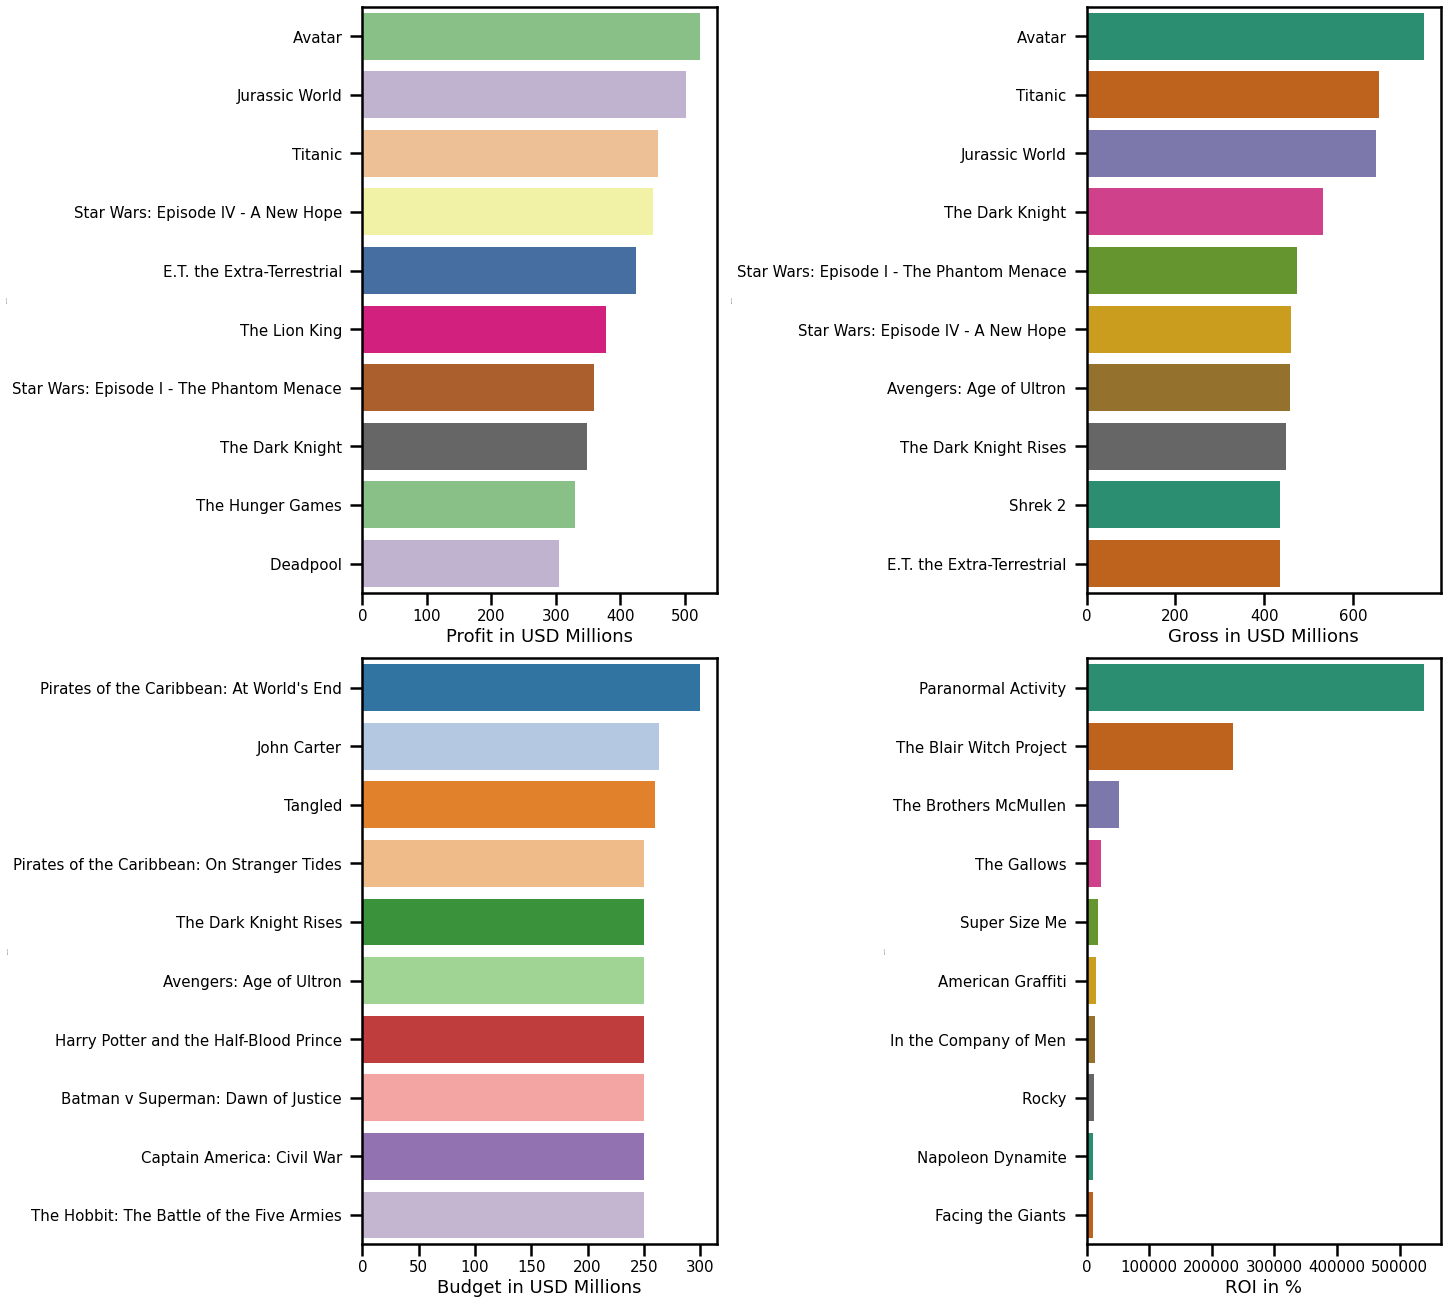

In [12]:
#creating dataframes
top_10_profit = movies[['movie_title', 'profit']].sort_values(by = 'profit', ascending = False)[:10]
top_10_gross = movies[['movie_title', 'gross ($) millions']].sort_values(by='gross ($) millions',ascending=False)[:10]
top_10_budget = movies[['movie_title', 'budget ($) millions']].sort_values(by = 'budget ($) millions', ascending = False)[:10]
top_10_roi = movies[['movie_title', 'roi']].sort_values(by = 'roi', ascending = False)[:12]

#visualizing top 10 grossing, profitable, highest budget, highest roi movies

plt.rc('ytick', labelsize = 15) 
plt.rc('xtick', labelsize = 15)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols = 2,nrows = 2,figsize = (20, 18), constrained_layout = True)

sns.barplot(data = top_10_profit, x = 'profit', y = 'movie_title', palette = 'Accent', ax = ax1)
ax1.tick_params(axis= 'y')
ax1.set_xlabel('Profit in USD Millions',fontsize = 18)
ax1.set_ylabel('movie title', fontsize = 1)

sns.barplot(data = top_10_gross, x = 'gross ($) millions', y = 'movie_title', palette = 'Dark2', ax = ax2)
ax2.tick_params(axis= 'y')
ax2.set_xlabel('Gross in USD Millions',fontsize = 18)
ax2.set_ylabel('movie title', fontsize = 1)

sns.barplot(data = top_10_budget, x = 'budget ($) millions', y = 'movie_title', palette = 'tab20', ax = ax3)
ax3.tick_params(axis= 'y')
ax3.set_xlabel('Budget in USD Millions',fontsize = 18)
ax3.set_ylabel('movie title', fontsize = 1)

sns.barplot(data = top_10_roi[-10:], x = 'roi', y = 'movie_title', palette = 'Dark2', ax = ax4)
ax4.tick_params(axis= 'y')
ax4.set_xlabel('ROI in %',fontsize = 18);
ax4.set_ylabel('movie title', fontsize = 1);

# 4.1 What is the correlation between budget and profit? Which budget ranges should be considered for making a Box Office success?

**Analysis**

In order to answer this question I will examine several key things:

- What is the relationship between profit (profit margin) and budget?

Budget and profit show a clear positively linear relationship, which means that the higher the budget, the higher the profit of a movie.

The trend line in this plot of profit margin and budget is showing a negative trend, which can be explained by the fact that if we spend too much money on making a movie we can potentially descrease our profit margin.

- What is the average and median value of budget for the top 30 movies? and of total?
- What is the average and median value of profit margin for the top 30 movies? and of total?

Both averages and median values differ, so in order to adjust for obvious outliers such as Avatar, Jurassic World, and Titanic, we will consider the median values. 

**Recommendation**

- The optimal budget value for making a successfull movie should not be less than 40 Million US dollars, and on average I recommend it to be somewhere around 75 Million US dollars. This recommendation was made based on a profit margin greater than 0.6. There is evidence that higher budget movies risk a smaller profit margin, as shown in the plot, therefore we cannot conclude that very large budgets to be a certain indicator of a Box Office success.

**Visualizing the relationship between profit (profit margin) and budget?**

- in order to analyse this relatonship I needed to create a new dataframe containing movies with profit greater than 0

In [13]:
#creating a dataframe with profit > 0
movies_profitable = movies.loc[movies['profit'] > 0]
movies_profitable_sorted = movies_profitable.sort_values(by = 'profit', ascending = False)
movies_profitable_sorted.reset_index(inplace = True)
movies_profitable_sorted.head()

,index,Unnamed: 0,director_name,num_critic_reviews,duration,director_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,title_year,actor_2_facebook_likes,movie_score,movie_facebook_likes,budget ($) millions,gross ($) millions,num_voted_mill,profit,roi,profit_margin
0,0,0,James Cameron,723.0,178.0,0.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,2009.0,936.0,7.9,33000,237.0,760.51,0.89,523.51,220.89,0.69
1,25,25,Colin Trevorrow,644.0,124.0,365.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,...,2015.0,2000.0,7.0,150000,150.0,652.18,0.42,502.18,334.79,0.77
2,22,22,James Cameron,315.0,194.0,0.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,...,1997.0,14000.0,7.7,26000,200.0,658.67,0.79,458.67,229.33,0.70
3,2514,2514,George Lucas,282.0,125.0,0.0,Peter Cushing,11000.0,460935665.0,Action|Adventure|Fantasy|Sci-Fi,...,1977.0,1000.0,8.7,33000,11.0,460.94,0.91,449.94,4090.36,0.98
4,2555,2555,Steven Spielberg,215.0,120.0,14000.0,Dee Wallace,861.0,434949459.0,Family|Sci-Fi,...,1982.0,725.0,7.9,34000,10.5,434.95,0.28,424.45,4042.38,0.98


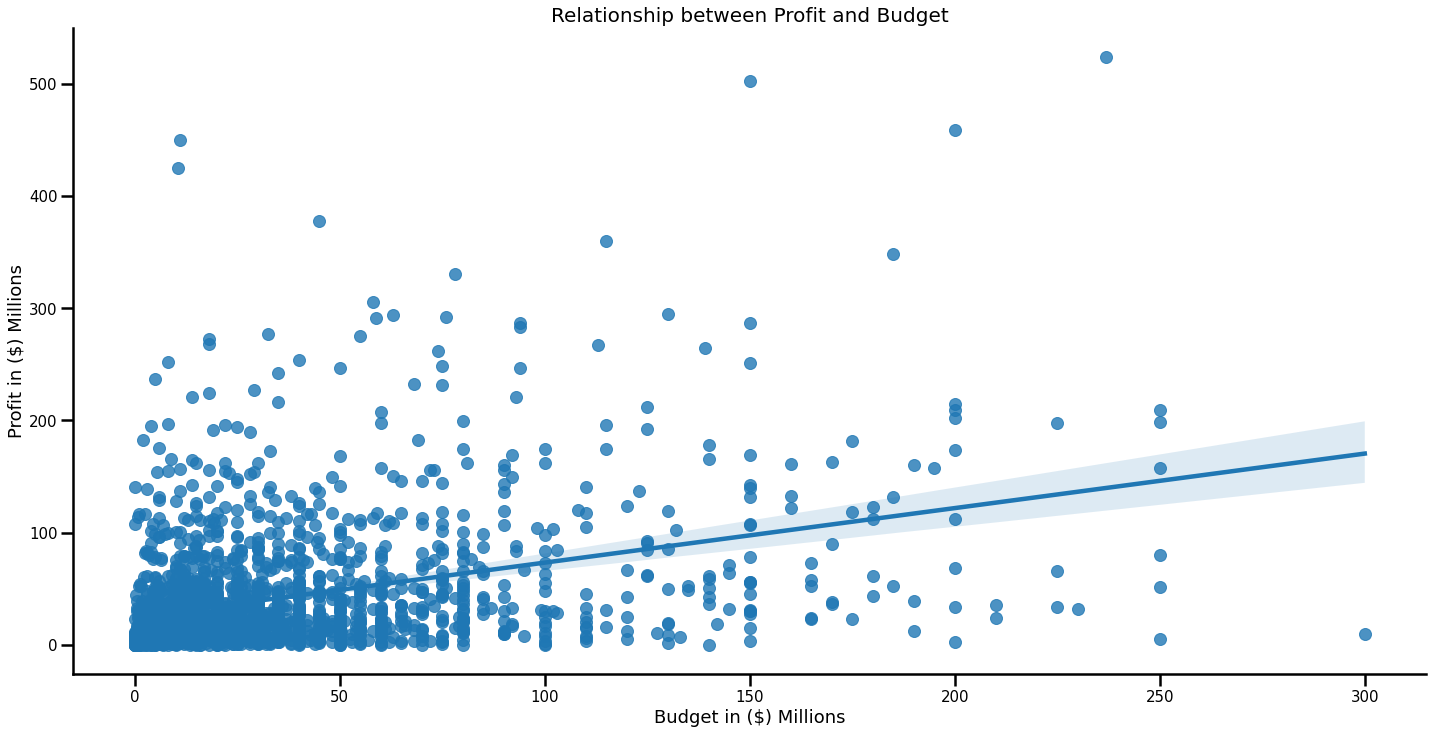

In [14]:
#visualizing the trend between profit vs budget

sns.lmplot(x = 'budget ($) millions', y = 'profit', data = movies_profitable_sorted, height = 10, aspect = 2)
plt.ylabel('Profit in ($) Millions', fontsize = 18)
plt.xlabel('Budget in ($) Millions', fontsize = 18)
plt.title('Relationship between Profit and Budget', fontsize = 20)
# plt.xticks(rotation = 'vertical')
plt.show();

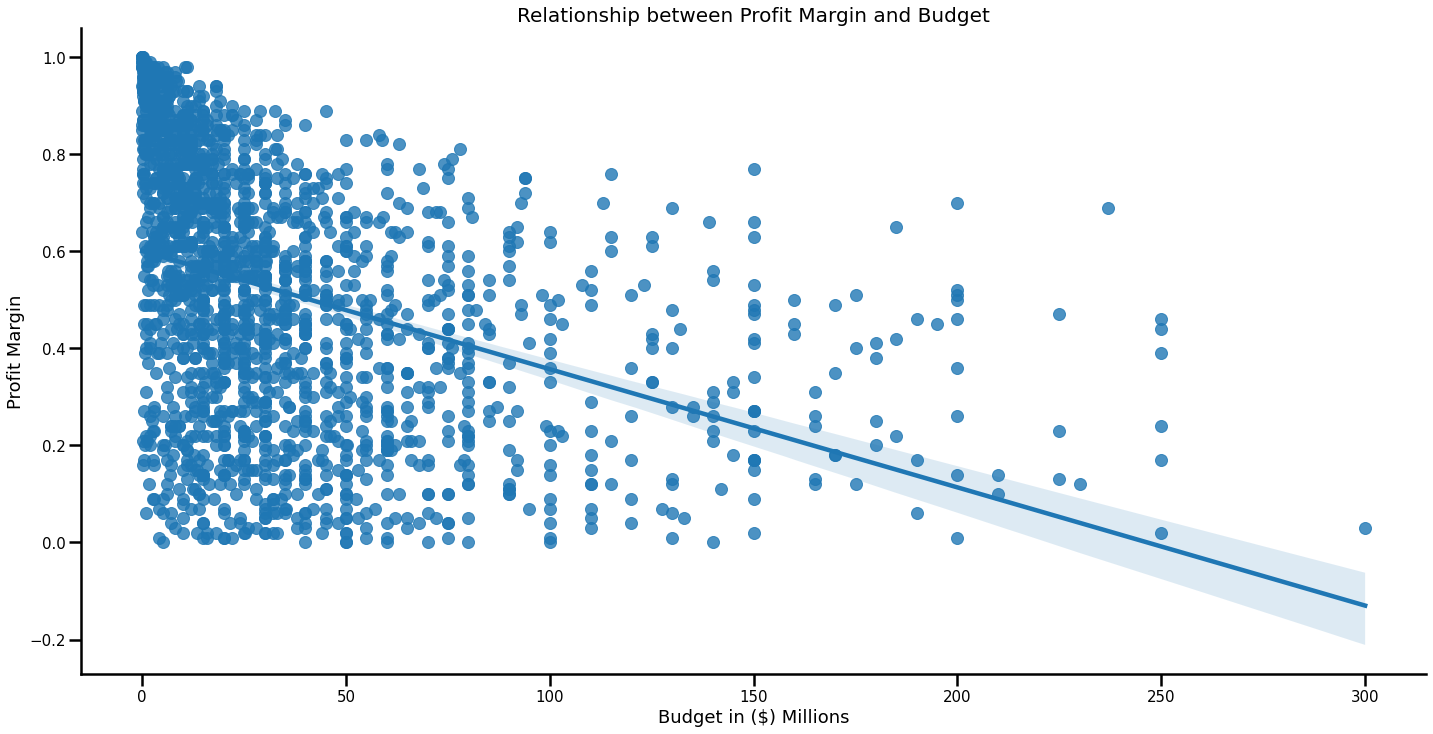

In [15]:
#visualizing the trend between profit margin vs budget

sns.lmplot(x = 'budget ($) millions', y = 'profit_margin', data = movies_profitable_sorted, height = 10, aspect = 2)
plt.ylabel('Profit Margin', fontsize = 18)
plt.xlabel('Budget in ($) Millions', fontsize = 18)
plt.title('Relationship between Profit Margin and Budget', fontsize = 20)
# plt.xticks(rotation = 'vertical')
plt.show();

**Visualizing the average and median value of budget for the top 30 movies and of total**

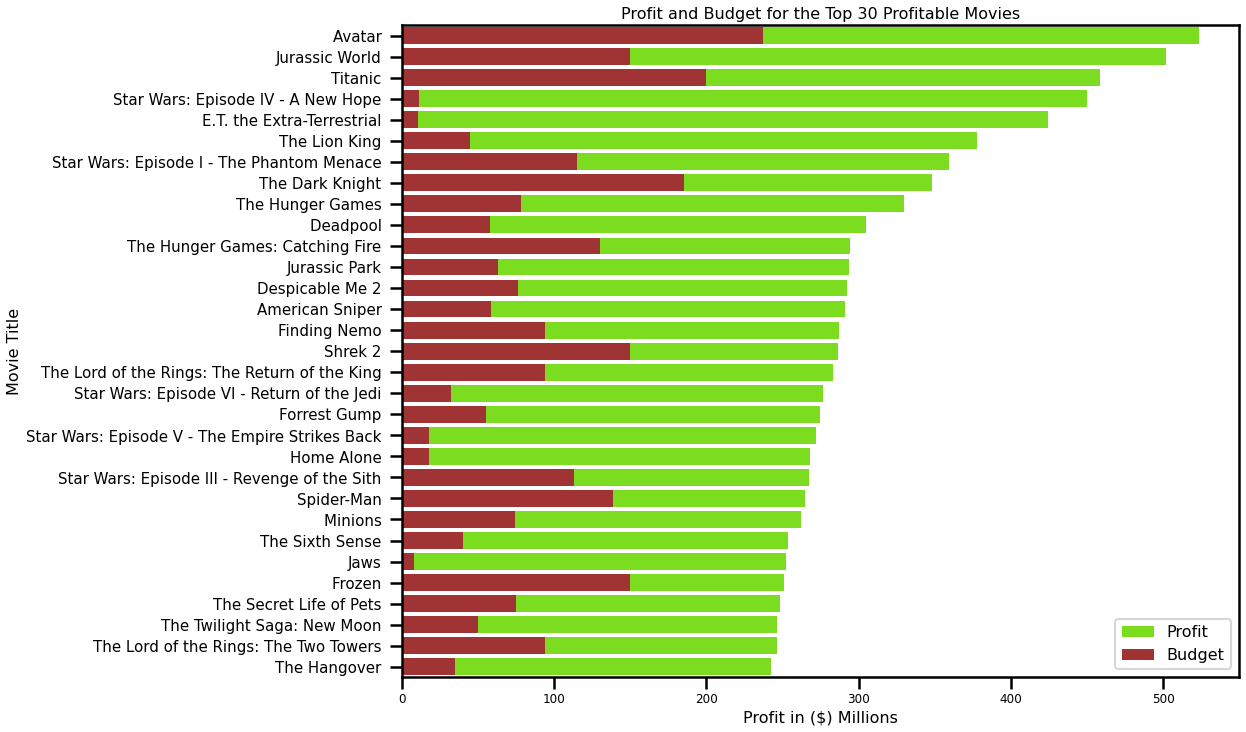

In [16]:
plt.figure(figsize=(15,12))

sns.barplot(x = movies_profitable_sorted.loc[0:30, 'profit'],
            y = movies_profitable_sorted.loc[0:30, 'movie_title'], 
            color = 'lawngreen', 
            label = 'Profit', 
            ci = None)

sns.barplot(x = movies_profitable_sorted.loc[0:30, 'budget ($) millions'],
            y = movies_profitable_sorted.loc[0:30, 'movie_title'], 
            color = 'firebrick', 
            label = 'Budget', 
            ci = None)

plt.xlabel('Profit in ($) Millions', fontsize = 16)
plt.ylabel('Movie Title', fontsize = 16)
plt.title('Profit and Budget for the Top 30 Profitable Movies', fontsize = 16)
plt.xticks(rotation='horizontal', fontsize = 12)
plt.legend(fontsize = 16);

In [17]:
print('Average Budget value of the Top 30 successful Movies - ', 
      round(movies_profitable_sorted.loc[0:29, 'budget ($) millions'].mean(), 2))
print('Median Budget value of the Top 30 successful Movies - ', 
      movies_profitable_sorted.loc[0:29, 'budget ($) millions'].median())
print('Average Budget value of all movies with Profit greater than 0 - ', 
      round(movies_profitable_sorted['budget ($) millions'].mean(), 2))
print('Median Budget value of all movies with Profit greater than 0 - ', 
      movies_profitable_sorted['budget ($) millions'].median())

Average Budget value of the Top 30 successful Movies -  87.39
Median Budget value of the Top 30 successful Movies -  75.5
Average Budget value of all movies with Profit greater than 0 -  36.26
Median Budget value of all movies with Profit greater than 0 -  23.0


**What is the average and median value of profit margin for the top 30 movies? and of total?**

In [18]:
print('Average Profit Margin of the Top 30 successful Movies - ', 
      round(movies_profitable_sorted.loc[0:29, 'profit_margin'].mean(), 2))
print('Median Profit Margin of the Top 30 successful Movies - ', 
      round(movies_profitable_sorted.loc[0:29, 'profit_margin'].median(), 2))
print('Average Profit Margin of all movies with Profit greater than 0 - ', 
      round(movies_profitable_sorted['profit_margin'].mean(), 2))
print('Median Profit Margin of all movies with Profit greater than 0 - ', 
      movies_profitable_sorted['profit_margin'].median())

Average Profit Margin of the Top 30 successful Movies -  0.8
Median Profit Margin of the Top 30 successful Movies -  0.79
Average Profit Margin of all movies with Profit greater than 0 -  0.51
Median Profit Margin of all movies with Profit greater than 0 -  0.52


In [19]:
#filtering out movies with profit margin > 0.6, top 30, median budget

margin_filter = movies[(movies['profit_margin'] > 0.6) & (movies['budget ($) millions'] > 23)]
margin_filter[['movie_title','profit_margin','budget ($) millions','profit']].describe()

,profit_margin,budget ($) millions,profit
count,193.000000,193.000000,193.000000
mean,0.711295,50.979793,133.052021
std,0.072936,33.887414,86.950432
min,0.610000,23.600000,41.180000
25%,0.660000,30.000000,75.240000
50%,0.690000,40.000000,107.590000
75%,0.760000,60.000000,160.150000
max,0.890000,237.000000,523.510000


# 4.2 Do actors/actresses and directors play a role in a movie's success?

**Analysis**

We will be working with actor1_total dataframe and director_total dataframe.

- It appears that movies where Robert Pattison stars, make almost 9 times the amount of the average movie. 
- Directors play a significant role, movies directed by George Lucas make little over 12 times the amount of the average movie. 
- Average mean VAR of actor/actress -  3.51
- Average mean VAR of directors -  3.36
- Average median VAR of actor/actress -  3.03
- Average median VAR of directors -  2.53

**Recommedation** 

- Analysis of the value actors/actresses and directors bring to the movies value is considerable. I can recommend that the studio takes in to account the VAR score of a actor/actress, and even more the VAR score of the person who will direct the movie. 

- For actors/actresses I recommend a range value of VAR between 1.0 and 3.0
- For directors I recommend a range value of VAR between 1.0 and 2.53

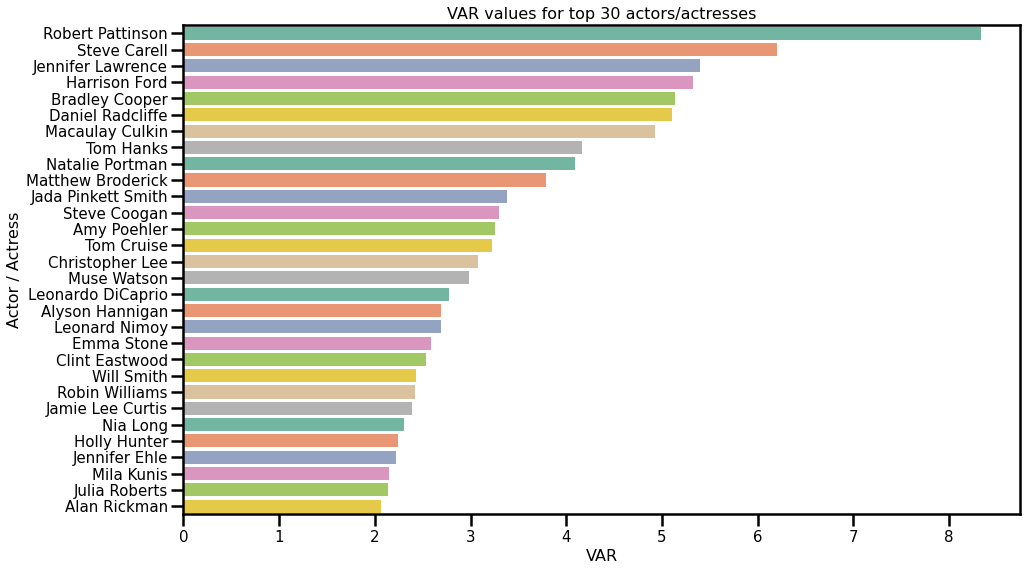

In [20]:
#visualizing top 30 actors / actresses and their VAR value

plt.figure(figsize=(15,9))

actor1_top30 = actor1_total[:30]

sns.barplot(x = 'VAR',
            y = 'actor_1_name',
            data = actor1_top30,
            palette = 'Set2')

plt.title('VAR values for top 30 actors/actresses', fontsize = 16)
plt.xlabel('VAR', fontsize = 16)
plt.ylabel('Actor / Actress', fontsize = 16);

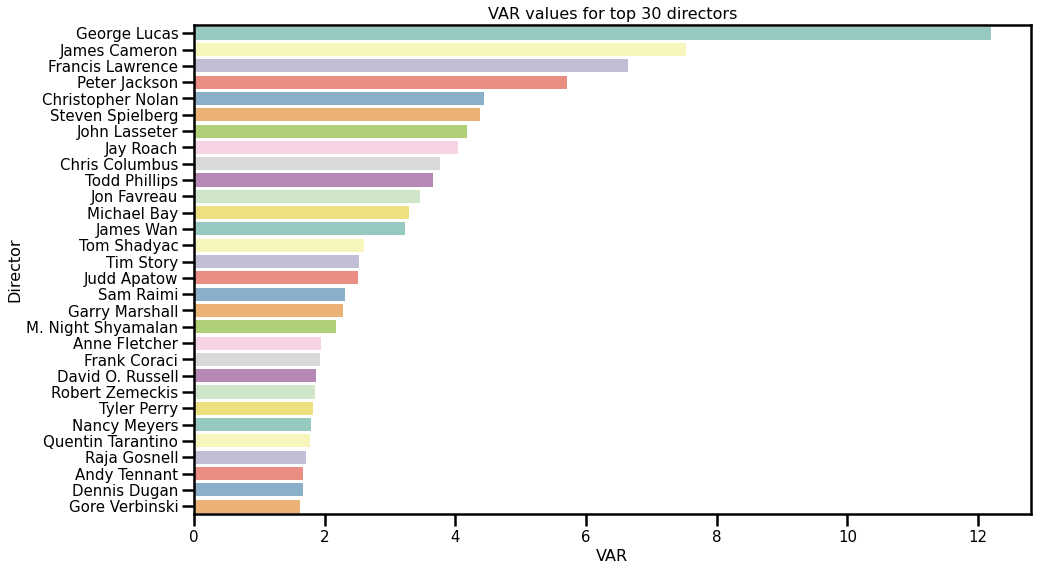

In [21]:
#visualizing top 30 directors and their VAR value

plt.figure(figsize=(15,9))

director_top30 = director_total[:30]

sns.barplot(x = 'VAR',
            y = 'director_name',
            data = director_top30,
            palette = 'Set3')

plt.title('VAR values for top 30 directors', fontsize = 16)
plt.xlabel('VAR', fontsize = 16)
plt.ylabel('Director', fontsize = 16);

In [22]:
print('Average mean VAR of actor/actress - ', round(actor1_top30['VAR'].mean(), 2))
print('Average mean VAR of directors - ', round(director_top30['VAR'].mean(), 2))

print('Average median VAR of actor/actress - ', round(actor1_top30['VAR'].median(), 2))
print('Average median VAR of directors - ', round(director_top30['VAR'].median(), 2))

Average mean VAR of actor/actress -  3.51
Average mean VAR of directors -  3.36
Average median VAR of actor/actress -  3.03
Average median VAR of directors -  2.53


# 4.3 How does a movie's score impact profit?

**Analysis**

- What is the distribution of ratings?

Normally distributed, slightly skewed to the right. Mean value is 6.42, and the median value is 6.5.

- Are ratings correlated with profit? 

Correlation with profit is positive but insignificant: 0.28, and correlation with profit_margin is close to zero: 0.03.

- What is the mean and median value of profit and profit margin for movies with ratings greater than 7?

I filtered out movies with profit greater than 0, and profit margin greater than 0.

- checking for an average IMDB rating director with at least 3 movies

**Recommendation** 

- I recommend taking into account the average movie score (not less than 7.0) of a director, when hiring one. We consider it will have a positive impact on profit. Another recommendation regarding movie scores will be in relation to movie's genre, and will be detailed later in the report.


In [23]:
movies['movie_score'].describe()

count    3410.000000
mean        6.422375
std         1.052963
min         1.600000
25%         5.800000
50%         6.500000
75%         7.100000
max         9.300000
Name: movie_score, dtype: float64

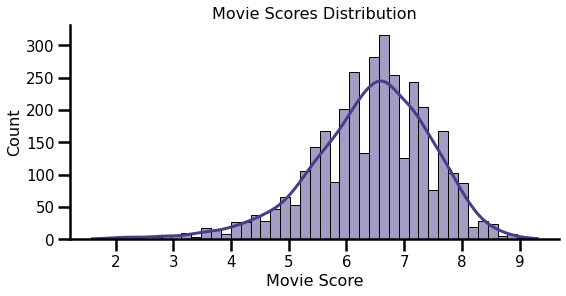

In [24]:
#visualizing the distribution of movie's scores

sns.displot(movies['movie_score'], kde = True, height = 4, aspect = 2, color = 'darkslateblue')
plt.title('Movie Scores Distribution', fontsize = 16)
plt.xlabel('Movie Score', fontsize = 16)
plt.ylabel('Count', fontsize = 16);

In [25]:
#showing correlation between movie score and profit

score_profit= movies[['movie_score', 'profit', 'profit_margin']]
score_profit_corr = score_profit.corr()
score_profit_corr

,movie_score,profit,profit_margin
movie_score,1.000000,0.281146,0.030936
profit,0.281146,1.000000,0.090494
profit_margin,0.030936,0.090494,1.000000


**What is the mean and median value of profit and profit margin for movies with ratings greater than 7?**

In [26]:
score_7plus = movies[(movies['movie_score'] >= 7) & (movies['profit'] >= 0) & (movies['profit_margin'] >= 0)]

In [27]:
score_7plus.describe()

,Unnamed: 0,num_critic_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_users_voted,cast_total_facebook_likes,num_user_reviews,budget,title_year,actor_2_facebook_likes,movie_score,movie_facebook_likes,budget ($) millions,gross ($) millions,num_voted_mill,profit,roi,profit_margin
count,762.000000,762.000000,762.000000,762.000000,762.000000,7.620000e+02,7.620000e+02,762.000000,762.000000,7.620000e+02,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000,762.000000
mean,1764.337270,236.346457,119.740157,1764.196850,10209.679790,9.640037e+07,2.434009e+05,15243.391076,584.480315,4.031403e+07,2000.181102,2806.253281,7.562073,21250.749344,40.314016,96.400446,0.243425,56.086430,inf,0.565512
std,1057.727045,156.004349,26.582096,4727.480935,24997.053811,1.018906e+08,2.431734e+05,28434.282376,577.816607,5.036026e+07,13.055980,5037.976750,0.438870,35271.408852,50.360281,101.890691,0.243209,71.605053,NaN,0.263518
min,0.000000,11.000000,37.000000,0.000000,0.000000,1.105360e+05,5.860000e+02,0.000000,9.000000,2.180000e+02,1933.000000,0.000000,7.000000,0.000000,0.000000,0.110000,0.000000,0.000000,0.000,0.000000
25%,836.250000,121.000000,101.000000,6.000000,826.500000,2.600384e+07,7.268000e+04,2159.750000,234.250000,7.625000e+06,1995.000000,427.000000,7.200000,0.000000,7.625000,26.002500,0.070000,10.640000,60.270,0.380000
50%,1806.000000,197.000000,116.000000,122.500000,7000.000000,6.119201e+07,1.724170e+05,9152.000000,415.500000,2.200000e+07,2003.000000,749.500000,7.500000,10000.000000,22.000000,61.190000,0.170000,31.075000,149.430,0.600000
75%,2735.250000,312.250000,132.000000,455.250000,15000.000000,1.279030e+08,3.243415e+05,20455.500000,717.000000,5.000000e+07,2010.000000,1000.000000,7.800000,26000.000000,50.000000,127.905000,0.320000,74.055000,367.085,0.787500
max,3408.000000,813.000000,289.000000,22000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,5060.000000,3.000000e+08,2016.000000,27000.000000,9.300000,349000.000000,300.000000,760.510000,1.690000,523.510000,inf,1.000000


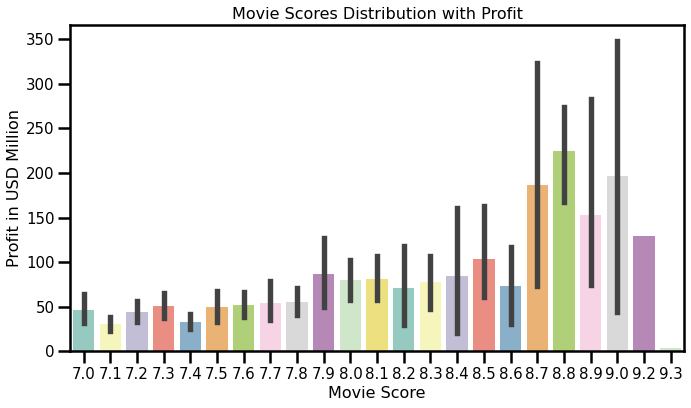

In [28]:
#visualizing average profit and upper/lower values and movie score trends

plt.figure(figsize=(11,6))
sns.barplot(data = score_7plus, x = 'movie_score', y = 'profit', palette = 'Set3')
plt.title('Movie Scores Distribution with Profit', fontsize = 16)
plt.xlabel('Movie Score', fontsize = 16)
plt.ylabel('Profit in USD Million', fontsize = 16);

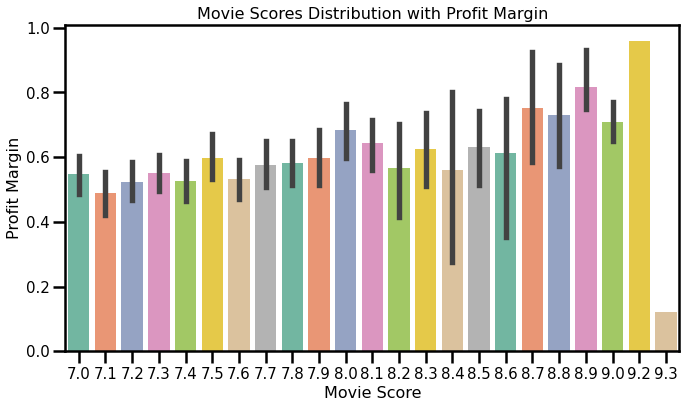

In [29]:
#visualizing average profit margin and upper/lower values and movie score trends

plt.figure(figsize=(11,6))
sns.barplot(data = score_7plus, x = 'movie_score', y = 'profit_margin', palette = 'Set2')
plt.title('Movie Scores Distribution with Profit Margin', fontsize = 16)
plt.xlabel('Movie Score', fontsize = 16)
plt.ylabel('Profit Margin', fontsize = 16);

In [30]:
#checking for an average IMDB rating director with at least 5 movies
director_rating = director.groupby('director_name')['movie_score'].mean().reset_index().sort_values(by = 'movie_score', ascending = False)

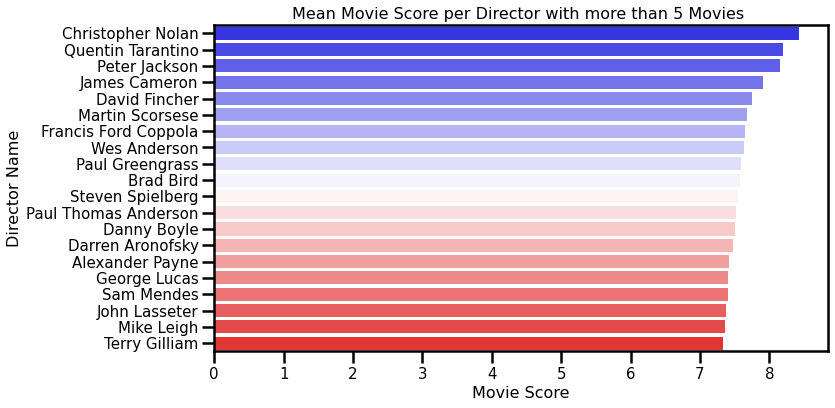

In [31]:
plt.figure(figsize=(11,6))
sns.barplot(data = director_rating[:20], x = 'movie_score', y = 'director_name', palette = 'bwr')
plt.title('Mean Movie Score per Director with more than 5 Movies ', fontsize = 16)
plt.xlabel('Movie Score', fontsize = 16)
plt.ylabel('Director Name', fontsize = 16);

# 4.4 How does the trend of profit, revenue, profit margin, and other attributes change over years?

In [32]:
movies['title_year'].describe()

count    3410.000000
mean     2002.815249
std         9.831935
min      1929.000000
25%      1999.000000
50%      2004.000000
75%      2010.000000
max      2016.000000
Name: title_year, dtype: float64

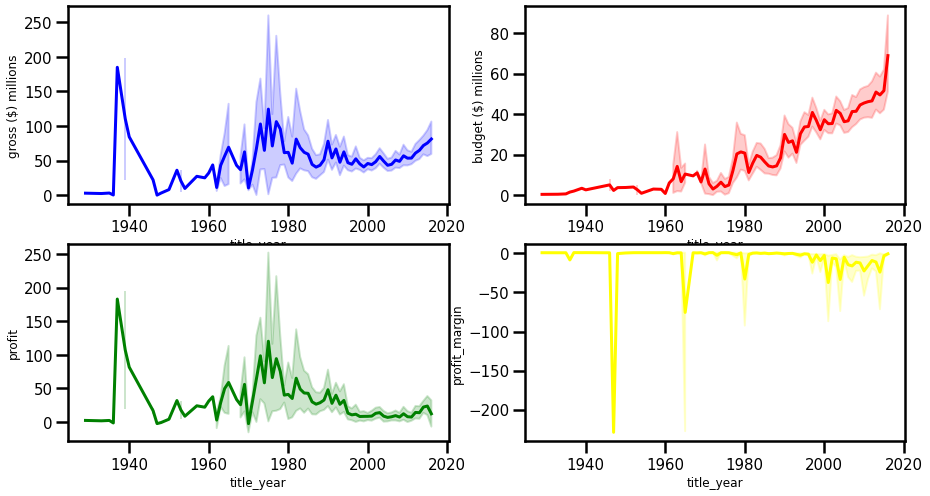

In [33]:
#visualizing budget, gross, profit and profit margin over time

fig,ax =  plt.subplots(2, 2,figsize = (15, 8))
sns.lineplot(x = "title_year", y = 'gross ($) millions', color = 'blue', data = movies, ax = ax[0][0])
sns.lineplot(x = "title_year", y = 'budget ($) millions', color = 'red', data = movies,ax = ax[0][1])
sns.lineplot(x = "title_year", y = 'profit', color = 'green', data = movies,ax = ax[1][0])
sns.lineplot(x = "title_year", y = 'profit_margin', color = 'yellow', data = movies, ax = ax[1][1]);

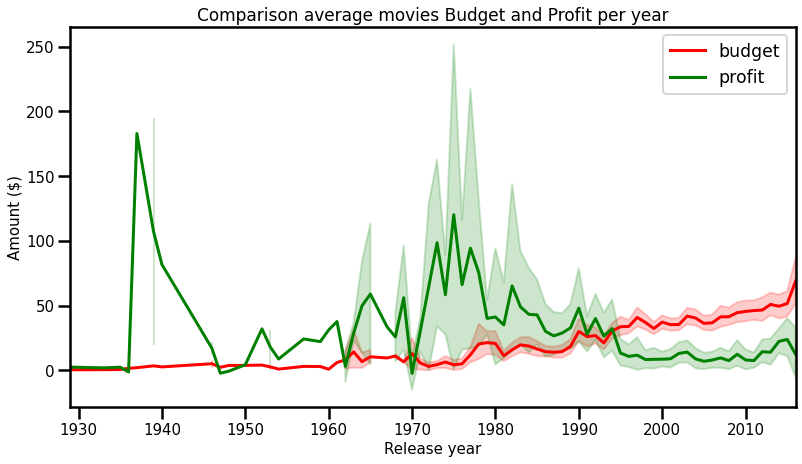

In [34]:
#visualizing budget and profit per year
plt.figure(figsize=(13,7))
lineplot_budget = sns.lineplot(data = movies, x = 'title_year', y = 'budget ($) millions', color = 'red', label = 'budget')
lineplot_profit = sns.lineplot(data = movies, x = 'title_year', y = 'profit', color = 'green', label = 'profit')
plt.xlabel("Release year",fontsize = 15)
plt.ylabel("Amount ($)",fontsize = 15)
plt.title("Comparison average movies Budget and Profit per year",fontsize = 17)
plt.legend(fontsize = 'x-large')
plt.xlim([1929, 2016])
plt.show();

something happened just before 1940's  let's see what had happened:

It appears that there were 3 movies at the time with a huge revenue:

- Snow White and the Seven Dwarfs 184.93
- Gone with the Wind 198.66
- Pinocchio 84.30

In [35]:
year_40s_anomaly = movies[(movies['title_year'] <= 1950) & (movies['title_year'] >= 1930)]

year_40s_anomaly[['movie_title', 
             'title_year', 
             'gross ($) millions', 
             'budget ($) millions', 
             'profit', 
             'profit_margin',
             'roi']].sort_values(by = 'title_year', ascending = False)

,movie_title,title_year,gross ($) millions,budget ($) millions,profit,profit_margin,roi
3062,Annie Get Your Gun,1950.0,8.00,3.77,4.23,0.53,112.20
3064,The Pirate,1948.0,2.96,3.70,-0.74,-0.25,-20.00
3194,The Lady from Shanghai,1947.0,0.01,2.30,-2.29,-229.00,-99.57
2876,Duel in the Sun,1946.0,20.40,8.00,12.40,0.61,155.00
3163,The Best Years of Our Lives,1946.0,23.65,2.10,21.55,0.91,1026.19
1018,Pinocchio,1940.0,84.30,2.60,81.70,0.97,3142.31
3059,Gone with the Wind,1939.0,198.66,3.98,194.68,0.98,4891.46
3131,The Wizard of Oz,1939.0,22.20,2.80,19.40,0.87,692.86
3230,Snow White and the Seven Dwarfs,1937.0,184.93,2.00,182.93,0.99,9146.50
3224,Modern Times,1936.0,0.16,1.50,-1.34,-8.38,-89.33


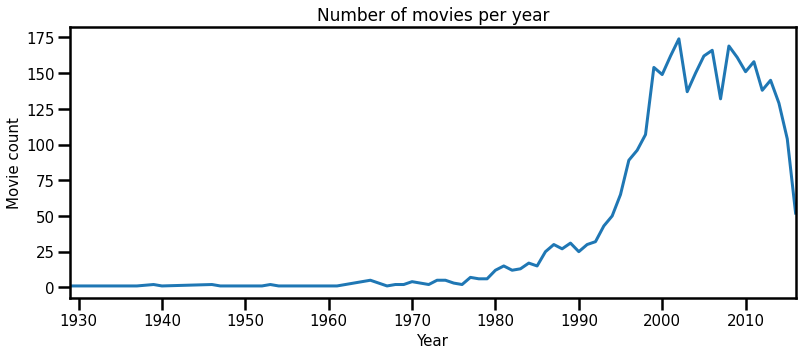

In [36]:
#et's see the number of movies released per year
movie_count_per_year = movies.groupby('title_year')['movie_title'].count()
movie_count_per_year.plot(figsize = (13,5))
plt.title('Number of movies per year', fontsize = 17)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Movie count', fontsize = 15)
plt.xlim([1929, 2016])
plt.show();

<AxesSubplot:xlabel='title_year', ylabel='num_voted_mill'>

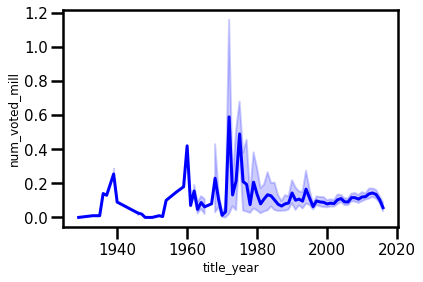

In [37]:
sns.lineplot(x = "title_year", y = 'num_voted_mill', color = 'blue', data = movies)

# 4.5 How do genres play in with profit and profit margin?

**Analysis**

- Comedy, Action, Drama, and Adventure make up the most  of the genres in the dataset.
- EXCLUDING GENRES that count less than 40 movies

**Recommendation** 

- I recommend investing in the Animation genre, in the above mentioned budget range of 40 Million US Dollars to 75 Million US Dollars, as well as Family and Adventure genres, as they show a desirable ROI, and are not as expensive. They can be on the lower end of the budget recommendations.

In [38]:
movies['genres']

0       Action|Adventure|Fantasy|Sci-Fi
1              Action|Adventure|Fantasy
2             Action|Adventure|Thriller
3                       Action|Thriller
4               Action|Adventure|Sci-Fi
                     ...               
3405                       Comedy|Drama
3406                       Comedy|Drama
3407                Comedy|Crime|Horror
3408              Drama|Sci-Fi|Thriller
3409                        Documentary
Name: genres, Length: 3410, dtype: object

In [39]:
#exploding genres into a separate dataframe
movies_df1 = pd.DataFrame(movies.genres.str.split('|').to_list())

#merging the genres dataframe with the original one
movies_df2 = pd.merge(movies, movies_df1, right_index = True, left_index = True)
movies_df3 = movies_df2.drop(['genres'], axis = 1)

#creating a new dataframe with first three genres taken into account
genre_movies_df = movies_df3.melt(id_vars=['movie_title', 'title_year'], value_vars=[0, 1, 2] ,var_name = ['X'])

#merging these two dataframes and removing duplicates and missing values
genre_movies_df = pd.merge(genre_movies_df, movies)
genre_movies_df = genre_movies_df.drop(['genres', 'X'], axis=1)
genre_movies_df = genre_movies_df.drop_duplicates()
genre_movies_df = genre_movies_df.rename(columns={'value': 'genres'})
genre_movies_df = genre_movies_df.dropna()

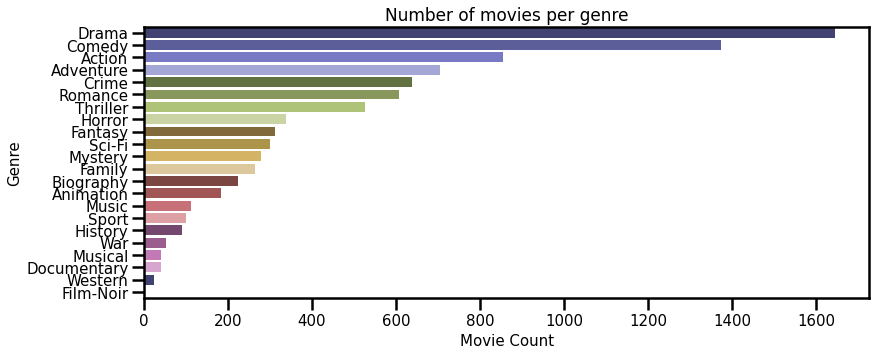

In [40]:
#counting movies per genre
genres_count = genre_movies_df['genres'].value_counts()
genres_count = genres_count.reset_index().rename(columns={'index': 'genres', 'genres': 'count'})

#plotting genres count
plt.figure(figsize = (13,5))
sns.barplot(data = genres_count, x = 'count', y = 'genres', palette = 'tab20b')
plt.title('Number of movies per genre', fontsize = 17)
plt.xlabel('Movie Count', fontsize = 15)
plt.ylabel('Genre', fontsize = 15);

In [41]:
#creating a list of genres that have too small sample size, and will not be taken into account when performing analysis
valid_sample_genre_list = list(genres_count['genres'][-7:].values)

#setting genre to be index
genre_movies_test = genre_movies_df.set_index('genres')

#dropping genres that have little to no sample size for further analysis
genre_movies_test = genre_movies_test.drop(valid_sample_genre_list)

In [42]:
#resetting the index
genre_movies_test.reset_index(inplace=True)
genres_final = genre_movies_test.rename(columns = {'index':'genre'})

In [43]:
#genre + profit, genre + budget, genre + ROI, genre + profit_margin dataframes
genres_profit = genres_final.groupby('genres', as_index = False)['profit'].median().sort_values(by = 'profit', ascending = False)
genres_roi = genres_final.groupby('genres', as_index = False)['roi'].median().sort_values(by = 'roi', ascending = False)
genres_budget = genres_final.groupby('genres', as_index = False)['budget ($) millions'].median().sort_values(by = 'budget ($) millions', ascending = False)
genres_profit_margin = genres_final.groupby('genres', as_index = False)['profit_margin'].median().sort_values(by = 'profit_margin', ascending = False)

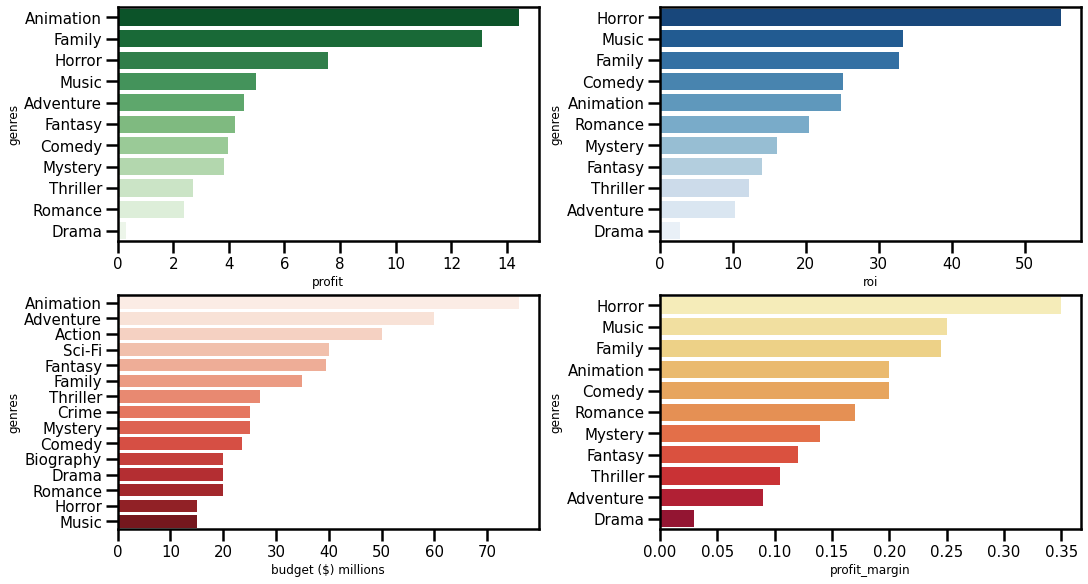

In [44]:
#plotting genre + profit, genre + budget, genre + ROI, genre + profit_margin dataframes
fig,ax =  plt.subplots(2, 2,figsize = (15, 8), constrained_layout = True)

sns.barplot(data = genres_profit[genres_profit['profit'] > 0], 
            x = 'profit', y = 'genres', palette = 'Greens_r', ax = ax[0][0])
sns.barplot(data = genres_roi[genres_roi['roi'] > 0], 
            x = 'roi', y = 'genres', palette = 'Blues_r', ax = ax[0][1])
sns.barplot(data = genres_budget, 
            x = 'budget ($) millions', y = 'genres', palette = 'Reds', ax = ax[1][0])
sns.barplot(data = genres_profit_margin[genres_profit_margin['profit_margin'] > 0], 
            x = 'profit_margin', y = 'genres', palette = 'YlOrRd', ax = ax[1][1]);

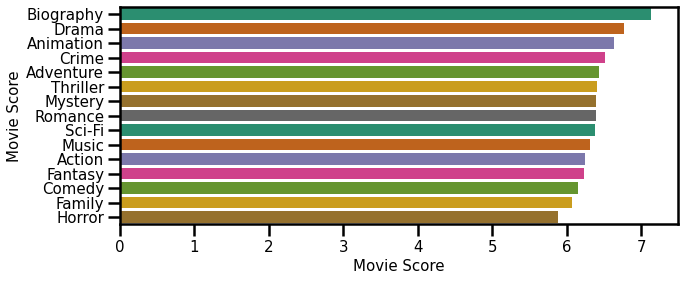

In [45]:
#visualizing top genres, and their average movie score

genres_score = genres_final.groupby('genres', as_index = False)['movie_score'].mean().sort_values(by='movie_score', ascending = False)
genres_score.reset_index(inplace = True)

plt.figure(figsize = (10,4))
sns.barplot(data = genres_score, x = 'movie_score', y = 'genres', palette = 'Dark2')
plt.xlabel('Movie Score', fontsize = 15)
plt.ylabel('Movie Score', fontsize = 15)
plt.show();

# 4.6 Is there a pattern in common plot keywords with successful movies?

**Conclusion**

- No relevant information was found n the initial analysis, the cntext of words is too broad to be able to find a pattern.

In [46]:
#plot keywords with profit_margin larger than 0.6
plotwords_profit_margin = movies[(movies['profit_margin'] > 0.6) & (movies['profit'] > 0)]['plot_keywords']

In [47]:
#downloading stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/tanja/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
#instantiating regex tokenizer that removes punctuation
tokenizer = RegexpTokenizer(r'\w+')

#applying the tokenizer to the text, and lowering all cases
movies['plot_keywords'] = movies['plot_keywords'].apply(lambda x: tokenizer.tokenize(x.lower()))
words = movies['plot_keywords'].apply(lambda x : ' '.join(x))
words = words.reset_index()

In [49]:
#splitting words and converting them to a list
words = words['plot_keywords'].tolist()
words = [word for line in words for word in line.split()]
len(words)

26201

In [50]:
#removing stopwords
filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
len(filtered_words)

24742

In [51]:
word_frequency = Counter(" ".join(filtered_words).split()).most_common(20)

In [52]:
plot_words = [word for word, _ in word_frequency]
word_counts = [counts for _, counts in word_frequency]

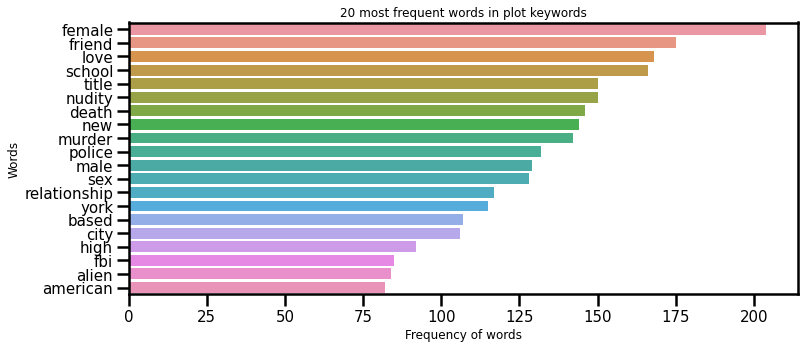

In [53]:
#visualizing 20 most common words
plt.figure(figsize = (12,5))
sns.barplot(x = word_counts, y = plot_words)
plt.title('20 most frequent words in plot keywords')
plt.ylabel('Words')
plt.xlabel('Frequency of words')
plt.show()

# 4.7 Are duration and content rating of the movie relevant to profit?

**Analysis**

- Investigate distribution of movie's scores, and analyze correlation between scores and profit
- Analyzing counts of content rating, and comparing content rating to movie scores, and profit/budget

**Conclusion**
- Focus on PG-13 movies, as the most common profitable genres (Animation, Adventure, Family) are in this group.

**Duration**

<Figure size 1080x504 with 0 Axes>

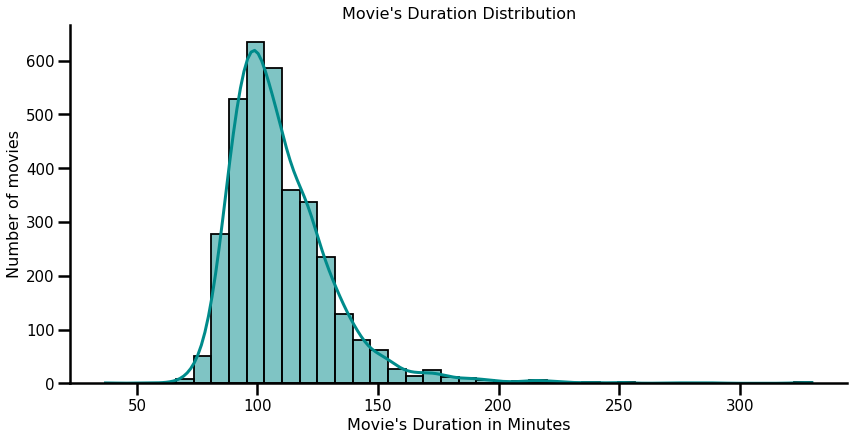

In [54]:
#visualizing the distribution of movie's scores
plt.figure(figsize = (15,7))
sns.displot(movies['duration'], kde = True, height = 6, aspect = 2, color = 'darkcyan', bins = 40)
plt.title("Movie's Duration Distribution", fontsize = 16)
plt.xlabel("Movie's Duration in Minutes", fontsize = 16)
plt.ylabel('Number of movies', fontsize = 16);

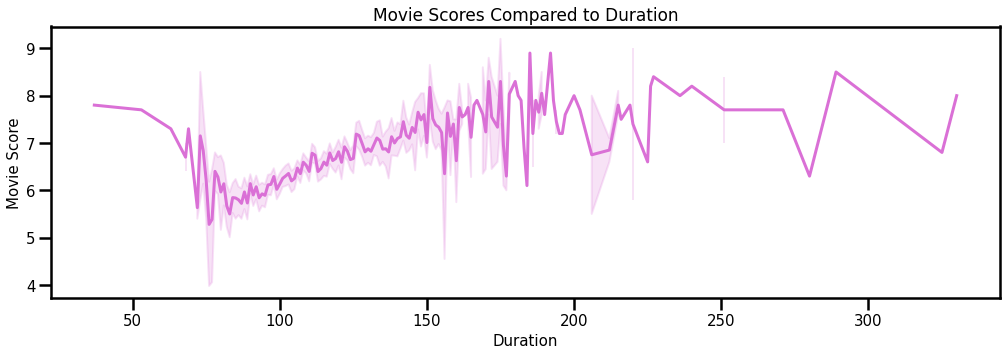

In [55]:
#visualizing duration and movie score
plt.figure(figsize=(17,5))
sns.lineplot(data = movies, x = 'duration', y = 'movie_score', color = 'orchid')
plt.xlabel('Duration',fontsize = 15)
plt.ylabel('Movie Score',fontsize = 15)
plt.title('Movie Scores Compared to Duration', fontsize = 17);

In [56]:
#correlation between duration and: profit, profit margin and movie score
duration_corr = movies[['duration', 'profit', 'profit_margin','budget', 'movie_score']]
duration_corr.corr()

,duration,profit,profit_margin,budget,movie_score
duration,1.000000,0.108516,0.015485,0.285337,0.382004
profit,0.108516,1.000000,0.090494,0.042716,0.281146
profit_margin,0.015485,0.090494,1.000000,0.018596,0.030936
budget,0.285337,0.042716,0.018596,1.000000,0.059691
movie_score,0.382004,0.281146,0.030936,0.059691,1.000000


**Content rating**

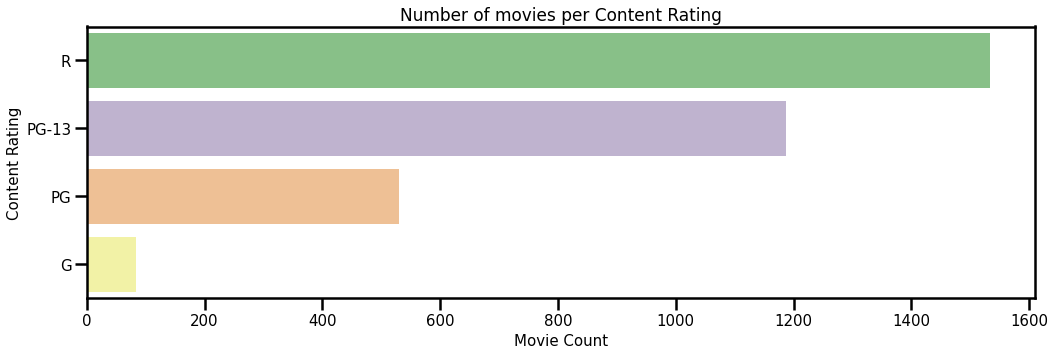

In [57]:
#plotting content rating and movie count
rating_count = movies.groupby('content_rating', as_index = False)['movie_title'].count().sort_values(by='movie_title', ascending = False)[:4]

plt.figure(figsize=(17,5))
sns.barplot(x = 'movie_title', y = 'content_rating', data = rating_count, palette = 'Accent')
plt.title('Number of movies per Content Rating', fontsize = 17)
plt.xlabel('Movie Count', fontsize = 15)
plt.ylabel('Content Rating', fontsize = 15);

In [58]:
#creating an array of content rating values
rating_sep = movies.groupby('content_rating', as_index = False)['movie_title'].count().sort_values(by='movie_title', ascending = False)
rating_sep['content_rating'].values

array(['R', 'PG-13', 'PG', 'G', 'Not Rated', 'Unrated', 'Approved', 'X',
       'NC-17', 'Passed', 'M', 'GP'], dtype=object)

In [59]:
#creating a list of content_rating that have too small sample size, and will not be taken into account when performing analysis
valid_sample_rating_list = list(rating_sep['content_rating'][-8:].values)

#setting genre to be index
rating_movies_test = movies.set_index('content_rating')

#dropping genres that have little to no sample size for further analysis
rating_movies_test = rating_movies_test.drop(valid_sample_rating_list)

In [60]:
#resetting the index
rating_movies_test.reset_index(inplace=True)
rating_final = rating_movies_test.rename(columns = {'index':'content_rating'})

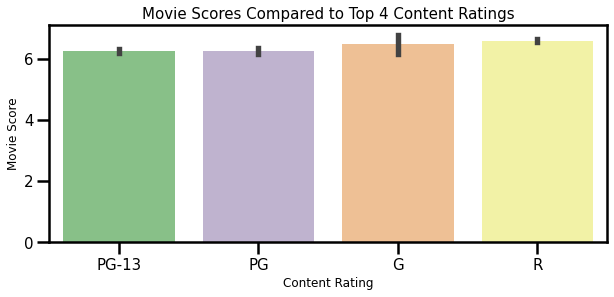

In [61]:
plt.figure(figsize=(10,4))
sns.barplot(data = rating_final, x = 'content_rating', y = 'movie_score', palette = 'Accent')
plt.xlabel('Content Rating',fontsize = 12)
plt.ylabel('Movie Score',fontsize = 12)
plt.title('Movie Scores Compared to Top 4 Content Ratings', fontsize = 15);

In [62]:
#content rating and profit, profit_margin,score, and budget

rating_profit = rating_final.groupby('content_rating', as_index = False)[['profit', 
                                                  'profit_margin', 
                                                  'budget ($) millions', 
                                                  'movie_score']].median().sort_values(by = 'profit', ascending = False)
rating_profit

,content_rating,profit,profit_margin,budget ($) millions,movie_score
0,G,15.280,0.260,30.0,6.6
1,PG,11.060,0.240,33.0,6.4
2,PG-13,2.825,0.105,35.0,6.3
3,R,0.470,0.040,17.0,6.6


# 4.8 How do number of users voted, and number of critical reviews impact profit?

**Conclusion** 
- There are no significant strategies to be recommended without having specific demographic information about users voted, users reviews, and number of critic reviews.

In [63]:
#mean and median values
movies[['num_critic_reviews','num_voted_mill','num_users_voted','num_user_reviews']].describe()

,num_critic_reviews,num_voted_mill,num_users_voted,num_user_reviews
count,3410.000000,3410.000000,3.410000e+03,3410.000000
mean,162.949560,0.105246,1.053108e+05,330.038123
std,122.144766,0.154043,1.539606e+05,405.356471
min,2.000000,0.000000,9.100000e+01,4.000000
25%,75.000000,0.020000,1.902500e+04,108.000000
50%,133.000000,0.050000,5.308600e+04,207.000000
75%,218.000000,0.130000,1.271668e+05,393.750000
max,813.000000,1.690000,1.689764e+06,5060.000000


In [64]:
#top 10 movies with most vote counts
top10_votes = movies.groupby('movie_title',as_index = False)['profit', 'num_voted_mill'].sum().sort_values(by = 'num_voted_mill', ascending = False)[:10]

top10_votes

,movie_title,profit,num_voted_mill
2978,The Shawshank Redemption,3.34,1.69
2570,The Dark Knight,348.32,1.68
1254,Inception,132.57,1.47
889,Fight Club,-25.98,1.35
1939,Pulp Fiction,99.93,1.32
931,Forrest Gump,274.69,1.25
2796,The Lord of the Rings: The Fellowship of the R...,220.84,1.24
2827,The Matrix,108.38,1.22
2797,The Lord of the Rings: The Return of the King,283.02,1.22
2645,The Godfather,128.82,1.16


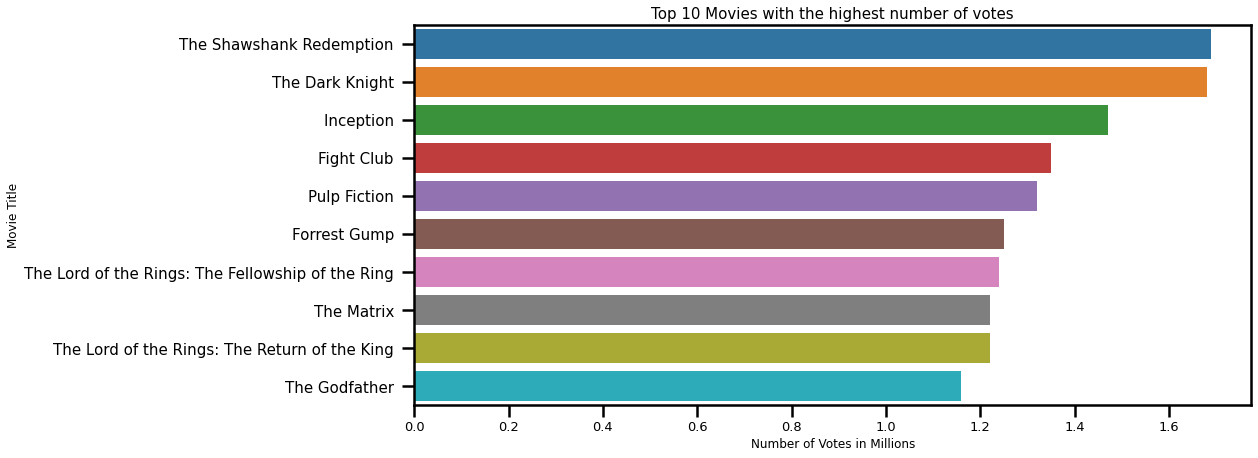

In [65]:
#visualizing top 10 voted movies with the most votes
plt.figure(figsize = (15,7))
ax = sns.barplot(data = top10_votes, x = 'num_voted_mill', y =  'movie_title')

plt.xlabel('Number of Votes in Millions',fontsize = 12)
plt.xticks(fontsize = 13)
plt.ylabel('Movie Title',fontsize = 12)

plt.title('Top 10 Movies with the highest number of votes', fontsize = 15);
# plt.savefig('top10_votes_profit.png');

In [66]:
#assessing correlation between number of votes, critical reviews and users voted with profit and profit margin
reviews_cotes_profit_corr = movies[['num_critic_reviews', 'num_users_voted', 'num_user_reviews',
                                   'profit', 'profit_margin']]
reviews_cotes_profit_corr.corr()

,num_critic_reviews,num_users_voted,num_user_reviews,profit,profit_margin
num_critic_reviews,1.000000,0.593035,0.557575,0.234495,0.056898
num_users_voted,0.593035,1.000000,0.788390,0.501590,0.044738
num_user_reviews,0.557575,0.788390,1.000000,0.390425,0.048647
profit,0.234495,0.501590,0.390425,1.000000,0.090494
profit_margin,0.056898,0.044738,0.048647,0.090494,1.000000


**Genres and Number of user voted, number of user reviews**

In [67]:
genre_reviews = genres_final.groupby('genres', 
                                     as_index = False)[['num_users_voted',
                                                        'num_user_reviews',
                                                        'num_critic_reviews']].sum().sort_values(by = 'num_users_voted', ascending = False)

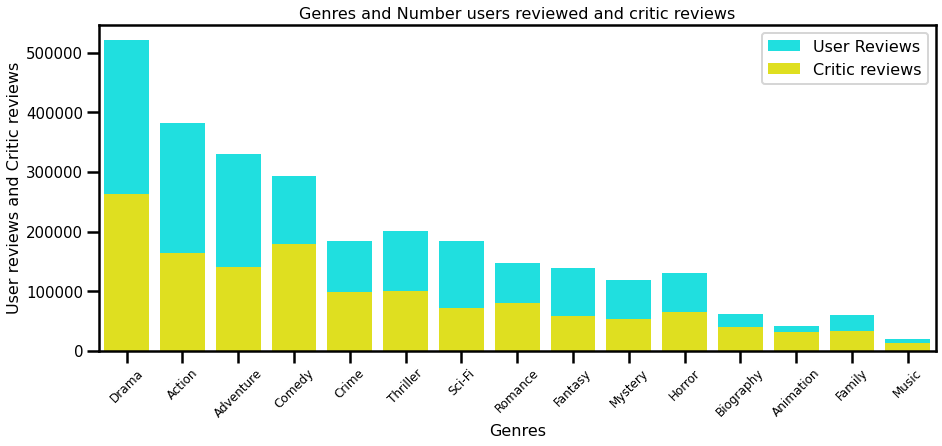

In [68]:
#visualizing Genres and Number users reviewed and critic reviews
plt.figure(figsize=(15,6))

sns.barplot(data = genre_reviews, x = 'genres', y = 'num_user_reviews', color = 'cyan', label = 'User Reviews', ci = None)            
sns.barplot(data = genre_reviews, x = 'genres', y = 'num_critic_reviews', color = 'yellow', label = 'Critic reviews', ci = None)            

plt.xlabel('Genres', fontsize = 16)
plt.title('Genres and Number users reviewed and critic reviews', fontsize = 16)
plt.ylabel('User reviews and Critic reviews', fontsize = 16)
plt.xticks(rotation = 45, fontsize = 12)
plt.legend(fontsize = 16);
# plt.savefig('reviews_and_critic_genres.png')

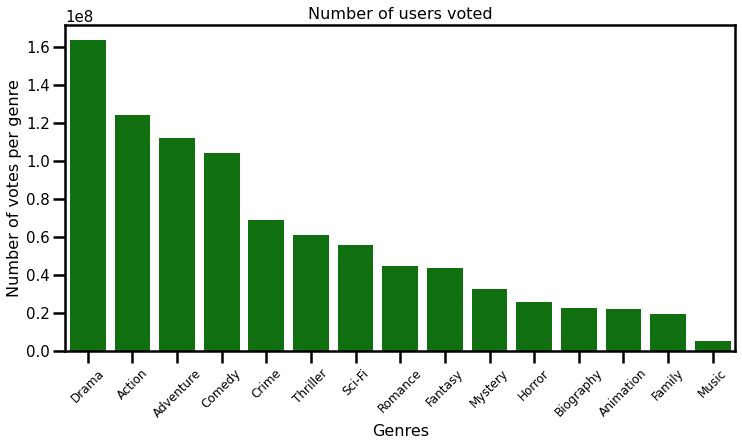

In [69]:
#visualizing number of users voted per genre
plt.figure(figsize=(12,6))
sns.barplot(data = genre_reviews, x = 'genres', y = 'num_users_voted', color = 'green', label = 'Users Voted', ci = None)
plt.xlabel('Genres', fontsize = 16)
plt.title('Number of users voted', fontsize = 16)
plt.ylabel('Number of votes per genre', fontsize = 16)
plt.xticks(rotation = 45, fontsize = 12);

**Profit and Number of user voted, number of user reviews**

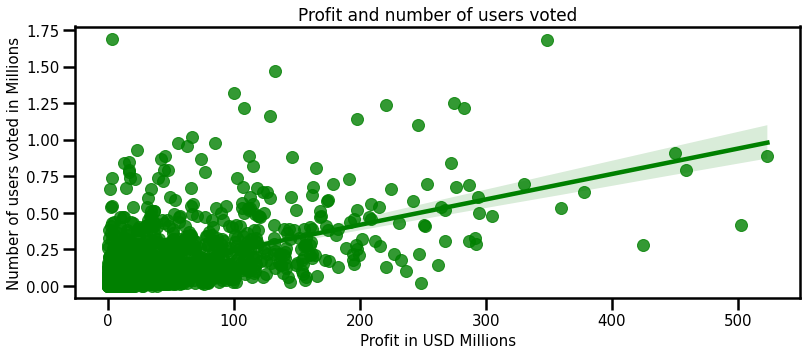

In [70]:
#visualizing profit and number of users voted
plt.figure(figsize=(13,5))
sns.regplot(data = movies[movies['profit'] > 0], 
             x = 'profit', y = 'num_voted_mill', color = 'green')
plt.xlabel('Profit in USD Millions',fontsize = 15)
plt.ylabel('Number of users voted in Millions',fontsize = 15)
plt.title('Profit and number of users voted', fontsize = 17);
# plt.savefig('reviews_and_critic_genres.png');